# HEATMAP
En este proyecto obtendremos la correlación de 11 ETFs, utilizando como pilar el SPY, el ETF con mayor volumen de negociación y liquidez que replica al S&P 500. El fin último será graficar la correlación de los activos a través de un heatmap o mapa de calor de la librería Seaborn.

In [3]:
# importando paquetes
import numpy as np
import pandas as pd
import datetime as dt

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# estableciendo rango de fecha
start = dt.datetime(2015,1,1)
end = dt.datetime.now()

In [5]:
# etfs a utilizar
etflist = ['SPY', 'TLT', 'GLD', 'QQQ', 'IWM', 'EEM', 'IEF', 'USO', 'DIA', 'EWZ', 'MCHI']
print(etflist)

['SPY', 'TLT', 'GLD', 'QQQ', 'IWM', 'EEM', 'IEF', 'USO', 'DIA', 'EWZ', 'MCHI']


In [6]:
# obteniendo la data desde yahoo finance
data = pdr.get_data_yahoo(etflist, start, end)
close_price = data['Close']
close_price.tail(3)

[*********************100%***********************]  11 of 11 completed


,DIA,EEM,EWZ,GLD,IEF,IWM,MCHI,QQQ,SPY,TLT,USO
Date,,,,,,,,,,,
2023-03-15 00:00:00-04:00,319.540009,37.270000,26.299999,178.210007,98.989998,173.610001,46.639999,298.929993,389.279999,106.099998,60.020000
2023-03-16 00:00:00-04:00,323.250000,37.840000,26.850000,178.570007,98.099998,175.979996,47.189999,306.809998,396.109985,105.269997,60.049999
2023-03-17 00:00:00-04:00,318.500000,37.610001,26.379999,183.770004,99.260002,171.229996,47.040001,305.359985,389.989990,106.849998,58.660000


In [7]:
close_price.shape

(2066, 11)

In [8]:
# verificando datos NaN
close_price.isnull().sum()

DIA     0
EEM     0
EWZ     0
GLD     0
IEF     0
IWM     0
MCHI    0
QQQ     0
SPY     0
TLT     0
USO     0
dtype: int64

In [9]:
# calculando variación procentual
change_price = close_price.pct_change().dropna()
change_price.tail(3)

,DIA,EEM,EWZ,GLD,IEF,IWM,MCHI,QQQ,SPY,TLT,USO
Date,,,,,,,,,,,
2023-03-15 00:00:00-04:00,-0.008225,-0.017141,-0.013133,0.007804,0.014450,-0.016485,-0.015826,0.005246,-0.006254,0.019310,-0.046242
2023-03-16 00:00:00-04:00,0.011610,0.015294,0.020913,0.002020,-0.008991,0.013651,0.011792,0.026361,0.017545,-0.007823,0.000500
2023-03-17 00:00:00-04:00,-0.014695,-0.006078,-0.017505,0.029120,0.011825,-0.026992,-0.003179,-0.004726,-0.015450,0.015009,-0.023147


In [10]:
# reordenando las columnas para dejar al SPY en la primera
change_price = change_price[['SPY', 'TLT', 'GLD', 'QQQ', 'IWM', 'EEM', 'IEF', 'USO', 'DIA', 'EWZ', 'MCHI']]
change_price

,SPY,TLT,GLD,QQQ,IWM,EEM,IEF,USO,DIA,EWZ,MCHI
Date,,,,,,,,,,,
2015-01-05 00:00:00-05:00,-0.018060,0.015709,0.015077,-0.014669,-0.013369,-0.017797,0.006102,-0.055304,-0.017422,-0.034219,-0.001393
2015-01-06 00:00:00-05:00,-0.009419,0.018017,0.011399,-0.013408,-0.017300,-0.004202,0.006718,-0.039383,-0.008293,0.017862,-0.009564
2015-01-07 00:00:00-05:00,0.012461,-0.001975,-0.005891,0.012891,0.012315,0.021625,-0.000185,0.017729,0.012688,0.027043,0.025548
2015-01-08 00:00:00-05:00,0.017745,-0.013243,-0.004209,0.019140,0.016962,0.017037,-0.004079,0.009798,0.018053,0.015966,0.010004
2015-01-09 00:00:00-05:00,-0.008014,0.010953,0.011385,-0.006583,-0.009603,-0.003300,0.004933,-0.014555,-0.008615,-0.002757,-0.003302
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13 00:00:00-04:00,-0.001425,0.002273,0.022948,0.007416,-0.016290,0.001586,0.012124,-0.028150,-0.002846,-0.015544,0.008560
2023-03-14 00:00:00-04:00,0.016530,-0.016442,-0.005791,0.022980,0.018522,0.000528,-0.009441,-0.035556,0.010570,0.001880,0.005517
2023-03-15 00:00:00-04:00,-0.006254,0.019310,0.007804,0.005246,-0.016485,-0.017141,0.014450,-0.046242,-0.008225,-0.013133,-0.015826


In [12]:
# matriz de correlación
corr = change_price.corr()
corr

,SPY,TLT,GLD,QQQ,IWM,EEM,IEF,USO,DIA,EWZ,MCHI
SPY,1.000000,-0.266108,0.029106,0.929051,0.883026,0.763423,-0.218040,0.331987,0.962869,0.571329,0.583820
TLT,-0.266108,1.000000,0.316981,-0.189090,-0.257086,-0.208352,0.915868,-0.203682,-0.302171,-0.182787,-0.161715
GLD,0.029106,0.316981,1.000000,0.042620,0.024698,0.125450,0.391401,0.068719,0.008544,0.113701,0.066789
QQQ,0.929051,-0.189090,0.042620,1.000000,0.789673,0.732275,-0.151575,0.243576,0.833777,0.486470,0.616529
IWM,0.883026,-0.257086,0.024698,0.789673,1.000000,0.711795,-0.216080,0.323697,0.858308,0.547925,0.550429
EEM,0.763423,-0.208352,0.125450,0.732275,0.711795,1.000000,-0.177383,0.351178,0.738533,0.714157,0.870011
IEF,-0.218040,0.915868,0.391401,-0.151575,-0.216080,-0.177383,1.000000,-0.179011,-0.257013,-0.152575,-0.153564
USO,0.331987,-0.203682,0.068719,0.243576,0.323697,0.351178,-0.179011,1.000000,0.347071,0.349178,0.236146
DIA,0.962869,-0.302171,0.008544,0.833777,0.858308,0.738533,-0.257013,0.347071,1.000000,0.581859,0.536148
EWZ,0.571329,-0.182787,0.113701,0.486470,0.547925,0.714157,-0.152575,0.349178,0.581859,1.000000,0.469532


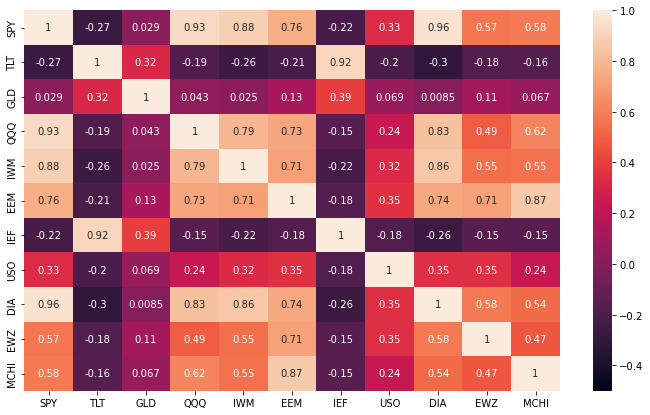

In [15]:
# graficando
plt.figure(figsize=(12, 7))
sns.heatmap(corr, 
            vmax=1, vmin=-.5, 
            fmt='.2g',
            annot=True);